In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

In [39]:
img_path = '/workspaces/data/ObjectClassify/lemon/train_images/train_0000.jpg'

In [40]:
def get_img_float():
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
    img /= 255.0
    return img

def get_img_uint():
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


In [41]:
def plot_img(transform, img_func):
    plt.subplot(1, 3, 1)
    plt.title('origin')
    plt.imshow(img_func)
    plt.subplot(1, 3, 2)
    plt.title('transformed 1')
    plt.imshow(transform(image=img_func)["image"])
    plt.subplot(1, 3, 3)
    plt.title('transformed 2')
    plt.imshow(transform(image=img_func)["image"])
    plt.show()
    plt.clf()
    plt.close()

In [42]:
img = get_img_uint()
plt.show()

w: 640, h: 640


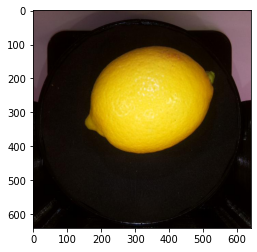

In [43]:
img = get_img_float()
print(f"w: {img.shape[1]}, h: {img.shape[0]}")
plt.imshow(img)
plt.show()

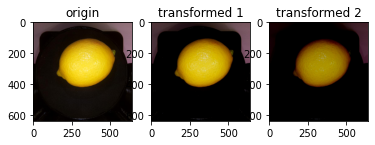

In [44]:
transform = A.RandomBrightness(limit=0.5, p=1)

plot_img(transform, get_img_uint())


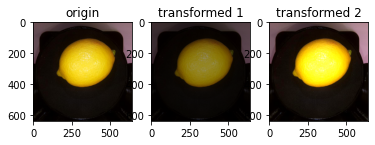

In [45]:
transform = A.RandomContrast(limit=(-0.5, 0.5), p=1)

plot_img(transform, get_img_uint())

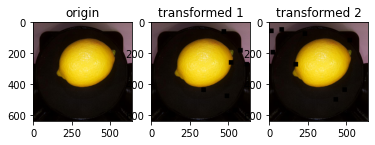

In [46]:
transform = A.Cutout(num_holes=8, max_h_size=30, 
                     max_w_size=30, fill_value=0, p=1)

plot_img(transform, get_img_uint())

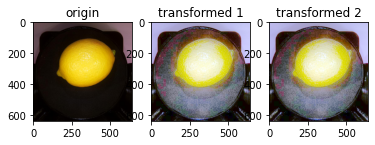

In [47]:
transform = A.Equalize(mode='cv', by_channels=True,
                       mask=None, mask_params=(), p=1)

plot_img(transform, get_img_uint())

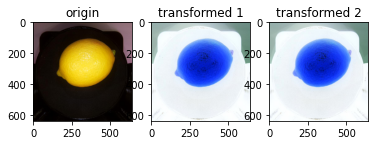

In [48]:
transform = A.InvertImg(p=1)

plot_img(transform, get_img_uint())

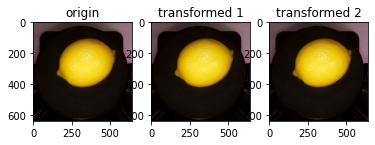

In [49]:
transform = A.Posterize(num_bits=8, p=1)

plot_img(transform, get_img_uint())

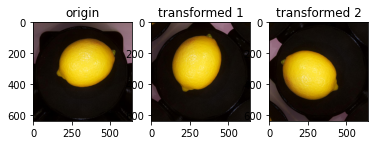

In [50]:
transform = A.Rotate(limit=180, interpolation=1, border_mode=4, p=1)

plot_img(transform, get_img_uint())

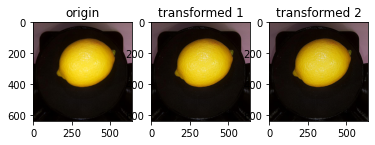

In [51]:
transform = A.IAASharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=1)

plot_img(transform, get_img_uint())

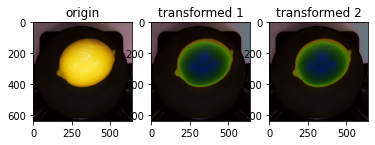

In [52]:
transform = A.Solarize(threshold=128, p=1)

plot_img(transform, get_img_uint())

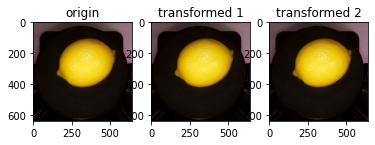

In [53]:
transform = A.ToFloat(max_value=None,p=1)

plot_img(transform, get_img_uint())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


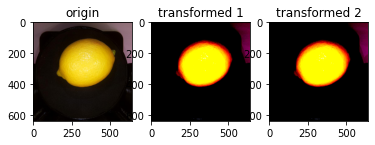

In [54]:
cifar10_mean = (0.4914, 0.4822, 0.4465)
cifar10_std = (0.2471, 0.2435, 0.2616)
transform = A.Normalize(mean=cifar10_mean, std=cifar10_std,  max_pixel_value=255, p=1)

plot_img(transform, get_img_uint())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


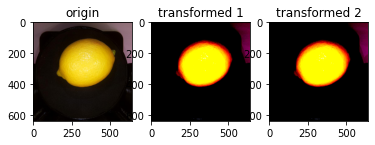

In [55]:
cifar10_mean = (0.4914, 0.4822, 0.4465)
cifar10_std = (0.2471, 0.2435, 0.2616)
transform = A.Compose([
    A.ToFloat(max_value=1, p=1),
    A.Normalize(mean=cifar10_mean, std=cifar10_std,  max_pixel_value=1, p=1)
])

plot_img(transform, get_img_float())

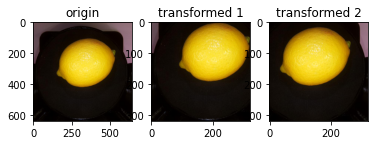

In [64]:
transform = A.RandomSizedCrop(min_max_height=[320, 480], 
                              height=320, width=320, w2h_ratio=1., p=1)

plot_img(transform, get_img_uint())

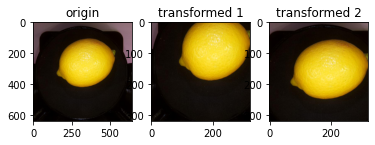

In [63]:
transform = A.RandomResizedCrop(height=320, width=320, scale=(0.08, 1.0), p=1)

plot_img(transform, get_img_uint())

## pixel check

In [138]:
cifar10_mean = (0.4914, 0.4822, 0.4465)
cifar10_std = (0.2471, 0.2435, 0.2616)
transform = A.Compose([
    A.Normalize(mean=cifar10_mean, std=cifar10_std,  max_pixel_value=1, p=1)
])

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
img /= 255.0

_img = transform(image=img)["image"]
print(f"dtype:{img.dtype}, max: {img.max()}, min: {img.min()}")
print(f"dtype:{_img.dtype}, max: {_img.max()}, min: {_img.min()}")


dtype:float32, max: 1.0, min: 0.0
dtype:float32, max: 2.094278573989868, min: -1.9886685609817505


In [140]:
cifar10_mean = (0.4914, 0.4822, 0.4465)
cifar10_std = (0.2471, 0.2435, 0.2616)
transform = A.Compose([
    #A.ToFloat(max_value=1, p=1),
    A.Normalize(mean=cifar10_mean, std=cifar10_std,  max_pixel_value=255, p=1)
])

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

_img = transform(image=img)["image"]
print(f"dtype:{img.dtype}, max: {img.max()}, min: {img.min()}")
print(f"dtype:{_img.dtype}, max: {_img.max()}, min: {_img.min()}")


dtype:uint8, max: 255, min: 0
dtype:float32, max: 2.0942788124084473, min: -1.98866868019104


In [141]:
cifar10_mean = (0.4914, 0.4822, 0.4465)
cifar10_std = (0.2471, 0.2435, 0.2616)
transform = A.Compose([
    A.ToFloat(max_value=1, p=1),
])

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

_img = transform(image=img)["image"]
print(f"dtype:{img.dtype}, max: {img.max()}, min: {img.min()}")
print(f"dtype:{_img.dtype}, max: {_img.max()}, min: {_img.min()}")


dtype:uint8, max: 255, min: 0
dtype:float32, max: 255.0, min: 0.0
